<a href="https://colab.research.google.com/github/pmaryh09/Intro-ML-S25/blob/main/assingment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** Maritza Perez
**Student id:** 801203851
**Assignment 1**

**Problem 1**

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

site = "https://raw.githubusercontent.com/pmaryh09/Intro-ML-S25/refs/heads/datasets/D3.csv"
df = pd.read_csv(site)


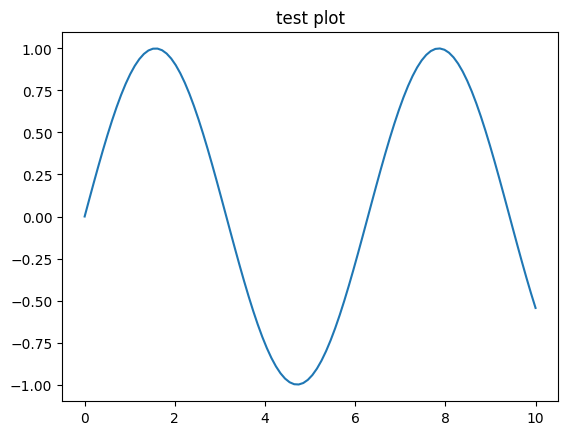

In [53]:
x1=df.values[:,0]
x2=df.values[:,1]
x3=df.values[:,2]
Y=df.values[:,3]

m = len(Y)  #num of traning examples

x0 = np.ones((m,1))
X1 = np.hstack((x0,x1.reshape(m,1)))
X2 = np.hstack((x0,x2.reshape(m,1)))
X3 = np.hstack((x0,x3.reshape(m,1)))

iterations = 1500
alpha = [0.01, 0.05, 0.10] #learning rates

x = np.linspace(0,10,100)
y = np.sin(x)

plt.plot(x,y)
plt.title("test plot")
plt.show()

In [45]:
def costFunc(X, y, theta):
  m = len(y)
  predictions = X.dot(theta)
  errors = np.subtract(predictions,y)
  sqrErrors = np.square(errors)
  J = 1 / (2*m) * np.sum(sqrErrors)
  return J

# Gradient Descent Function
def gradient_descent(X,y,alpha,iterations):
    m=len(y)
    theta=np.zeros(X.shape[1])
    cost_history=np.zeros(iterations)

    for i in range(iterations):
        predictions=X.dot(theta)
        errors=np.subtract(predictions,y)
        sum_delta=(alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i]=costFunc(X,y,theta)

    return theta, cost_history



In [46]:
def computeGradientDescentAlphas(X, y, alphas, iterations, name="Model"):
    thetas = []
    cost_histories = []
    results = []  # List to store results for table creation

    # Perform gradient descent for each learning rate
    for a in alphas:
        final_theta, cost_history = gradient_descent(X, y, a, iterations)
        thetas.append(final_theta)
        cost_histories.append(cost_history)
        results.append(
            {
                "Model": name,
                "Alpha": a,
                "Thetas": final_theta,
                "Final Cost": cost_history[-1],
            }
        )

    # Create and display the table
    df_results = pd.DataFrame(results)
    print(f"Results for {name}:\n")
    print(df_results)

    return thetas, cost_histories

In [49]:
def funcPlot(X,Y,alpha,thetas,cost_histories,iterations,name=""):
    plt.figure(figsize=(9,4))

    # Plot training data and regression lines
    plt.subplot(1,2,1)
    plt.scatter(X[:,1],Y,color='red',marker='+',label='Training Data')

    # Plot regression lines for different alphas
    for i in range(len(alpha)):
        plt.plot(X[:,1],X.dot(thetas[i]),label=f'Regression for {alpha[i]}')

    plt.grid(True)
    plt.legend()
    plt.title(f'Linear Model for {name}')
    plt.xlabel('Input Feature (X)')
    plt.ylabel('Target Variable (Y)')

    # Plot cost histories for different alphas
    plt.subplot(1,2,2)
    for i in range(len(alpha)):
        plt.plot(range(1,len(cost_histories[i]) + 1),cost_histories[i],label=f'Alpha={alpha[i]}')

    plt.grid(True)
    plt.legend()
    plt.title(f'Gradient Descent Cost History for {name}')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')

    plt.tight_layout()
    plt.show()